# **KNN Problem**

***Mobile Positiioning***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNN/Mobile_data.csv")
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [ ]:
df.loc[((df.pc == 0.0) & (df.fc > 0)), :]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range


In [ ]:
df.fc.value_counts().sort_index()

0     474
1     245
2     189
3     170
4     133
5     139
6     112
7     100
8      77
9      78
10     62
11     51
12     45
13     40
14     20
15     23
16     24
17      6
18     11
19      1
Name: fc, dtype: int64

In [ ]:
df.groupby(['fc','price_range'])['int_memory'].mean()

fc  price_range
0   0              32.157025
    1              31.741935
    2              30.495868
    3              34.648148
1   0              33.373134
                     ...    
18  0              10.000000
    1              49.333333
    2              10.333333
    3              28.000000
19  0              35.000000
Name: int_memory, Length: 75, dtype: float64

In [ ]:
df.loc[df.sc_w == 0, 'sc_w'].count()

180

In [5]:
df.sc_h.min(), df.sc_h.max()

(5, 19)

In [6]:
df_sc_hw_median = df.groupby('sc_h')['sc_w'].median()

In [ ]:
df_sc_hw_median

sc_h
5      2.0
6      2.0
7      3.0
8      4.0
9      3.5
10     4.0
11     6.0
12     7.0
13     6.0
14     7.0
15     7.0
16     8.0
17     8.0
18     8.0
19    10.0
Name: sc_w, dtype: float64

In [7]:
df_copy = df.copy(deep=True)

In [8]:
df_sc_w_missing = df.loc[df.sc_w == 0]

In [9]:
df_sc_w_missing.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
12,1815,2.8,2,33,0.6,159,4,17,607,748,1482,18,0,2,1
24,503,1.2,5,8,0.4,111,3,13,201,1245,2583,11,0,12,1
33,1310,2.2,0,51,0.6,100,4,0,178,1919,3845,7,0,12,3
42,1253,0.5,5,5,0.2,152,2,19,685,714,1878,15,0,4,1
50,1547,3.0,2,14,0.7,198,3,19,1042,1832,2059,5,0,15,2


In [10]:
## Replacing screen width == 0 with corresponding screen hight's screen width median value.
df.loc[df.sc_w == 0, 'sc_w'] = df.loc[df.sc_w == 0, 'sc_h'].apply(lambda x: df_sc_hw_median[x])

In [ ]:
df.sc_w.describe()

count    2000.000000
mean        6.206000
std         4.045676
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [ ]:
df.loc[[12,24,33]]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
12,1815,2.8,2,33,0.6,159,4,17,607,748,1482,18,8.0,2,1
24,503,1.2,5,8,0.4,111,3,13,201,1245,2583,11,6.0,12,1
33,1310,2.2,0,51,0.6,100,4,0,178,1919,3845,7,3.0,12,3


In [18]:
## Checking the px_height column
df.loc[[1481, 1933]]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1481,1834,2.1,7,40,0.1,99,4,11,1125,1987,3692,13,6.0,16,3
1933,897,2.0,3,2,0.6,154,8,10,363,994,1958,7,5.0,7,1


In [14]:
df.loc[(df.px_width > 990) & (df.px_width < 1000)]['px_height'].median()

363.0

In [15]:
df.loc[(df.px_width > 1985) & (df.px_width < 1990)]['px_height'].median()

1125.0

In [16]:
## Based on px_width, we identified the ideal value to fill the px_height for zero px_height column.
df.loc[1481, 'px_height'] = 1125
df.loc[1933, 'px_height'] = 363

In [20]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.852000,1251.515500,2124.213000,12.306500,6.206000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.485625,432.199447,1084.732044,4.213245,4.045676,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,565.500000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,948.000000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [88]:
df.loc[df.px_width == 500].shape[0]

2

In [85]:
df.loc[df.px_height < 100].shape[0]

148

After observation, it has been identified that px_height has not had appropriate values corresponding to px_width.  So, let us drop both the columns before build the model.

We have verified that when the phone does not have primary camera, the corresponding phone also does not have front camera.

In [89]:
X = df.drop(['price_range', 'px_height','px_width'], axis=1)

In [90]:
X.shape

(2000, 12)

In [91]:
y=df.iloc[:,-1]

In [92]:
y.shape

(2000,)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state = 42)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 12), (400, 12), (1600,), (400,))

In [119]:
y_train.value_counts()

1    400
0    400
3    400
2    400
Name: price_range, dtype: int64

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [107]:
k_values = range(3, 22, 2)
list(k_values)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [100]:
test_accuracy={}

In [120]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  predicted_values = knn.predict(X_test)
  test_accuracy[k] = accuracy_score(y_test, predicted_values)

In [121]:
test_accuracy

{3: 0.7825,
 5: 0.8025,
 7: 0.8025,
 9: 0.8075,
 11: 0.815,
 13: 0.825,
 15: 0.825,
 17: 0.835,
 19: 0.825,
 21: 0.835}

In [40]:
auto_test_accuracy = test_accuracy
auto_test_accuracy

{5: 0.57,
 7: 0.568,
 9: 0.554,
 11: 0.618,
 13: 0.648,
 15: 0.646,
 17: 0.654,
 19: 0.662,
 21: 0.658}

In [69]:
  ## With kd_tree Algorithm
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    knn.fit(X_train_scaled, y_train)
    predicted_values = knn.predict(X_test_scaled)
    test_accuracy[k] = accuracy_score(y_test, predicted_values)
test_accuracy

{3: 0.542,
 5: 0.584,
 7: 0.58,
 9: 0.618,
 11: 0.632,
 13: 0.632,
 15: 0.626,
 17: 0.628,
 19: 0.642,
 21: 0.642}

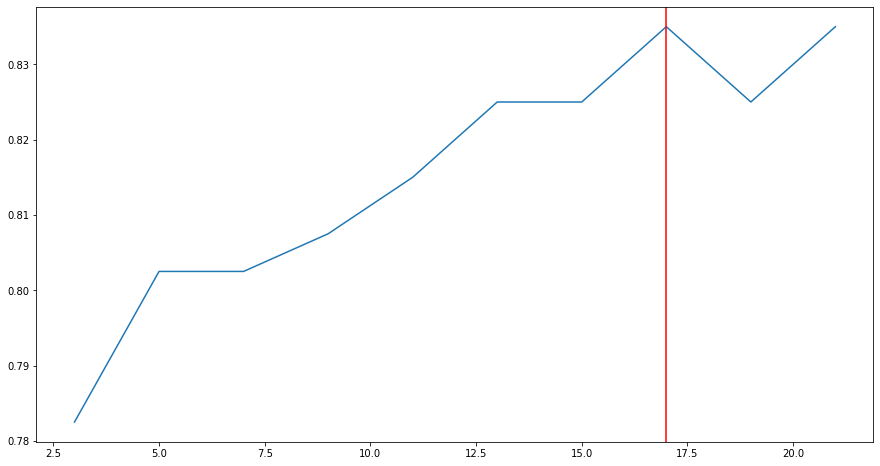

In [122]:
plt.figure(figsize=(15,8))
plt.plot(list(test_accuracy.keys()), list(test_accuracy.values()))
plt.axvline(x=17, color='red')
plt.show()

In [52]:
df_scores = pd.DataFrame(zip(list(test_accuracy.keys()), list(test_accuracy.values())), columns = ['kvalue','score'])

In [53]:
df_scores.sort_values('score', ascending=False)

,kvalue,score
7,19,0.662
8,21,0.658
6,17,0.654
4,13,0.648
5,15,0.646
3,11,0.618
0,5,0.570
1,7,0.568
2,9,0.554


In [123]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
predicted_values = knn.predict(X_test)

In [124]:
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       100
           1       0.79      0.79      0.79       100
           2       0.79      0.70      0.74       100
           3       0.87      0.89      0.88       100

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.83      0.83      0.83       400



In [125]:
confusion_matrix(y_test, predicted_values)

array([[96,  4,  0,  0],
       [13, 79,  8,  0],
       [ 0, 17, 70, 13],
       [ 0,  0, 11, 89]])

Based on the classification report, we can see that classes 1 and 2 has very poor predictions.  We need to inspect more on those classes to identify the issue.

In [58]:
y_test.value_counts()

2    135
1    126
3    123
0    116
Name: price_range, dtype: int64

In [57]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [128]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf, n_features_to_select = 5, verbose=1)
rfe.fit(X_train, y_train)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=5, verbose=1)

In [129]:
df_col_rank = pd.DataFrame(zip(X_train.columns, rfe.ranking_), columns = ['col','rank'])
df_col_rank.sort_values('rank')

,col,rank
0,battery_power,1
3,int_memory,1
5,mobile_wt,1
7,pc,1
8,ram,1
11,talk_time,2
1,clock_speed,3
10,sc_w,4
9,sc_h,5
4,m_dep,6


In [130]:
## printing the selected features
print(X_train.columns[rfe.support_])

Index(['battery_power', 'int_memory', 'mobile_wt', 'pc', 'ram'], dtype='object')


In [131]:
imp_cols = [x for x in X_train.columns[rfe.support_]]
imp_cols

['battery_power', 'int_memory', 'mobile_wt', 'pc', 'ram']

In [ ]:
X_train.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [132]:
X_tr_subset = X_train[imp_cols]
X_test_subset = X_test[imp_cols]

In [133]:
X_tr_subset.head()

,battery_power,int_memory,mobile_wt,pc,ram
469,1845,61,96,12,1731
565,1271,32,113,15,445
396,788,57,91,12,3969
452,1406,34,98,5,3915
325,920,25,115,14,785


In [ ]:
X_tr_scaled = sc.fit_transform(X_tr_subset)
X_ts_scaled = sc.transform(X_test_subset)

In [135]:
test_acc = {}
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train, y_train)
  pred_val = knn.predict(X_test)
  test_acc[k] = accuracy_score(y_test, pred_val)

In [140]:
max_k = min([k for k, v in test_acc.items() if v == max(test_acc.values())])
max_k

17

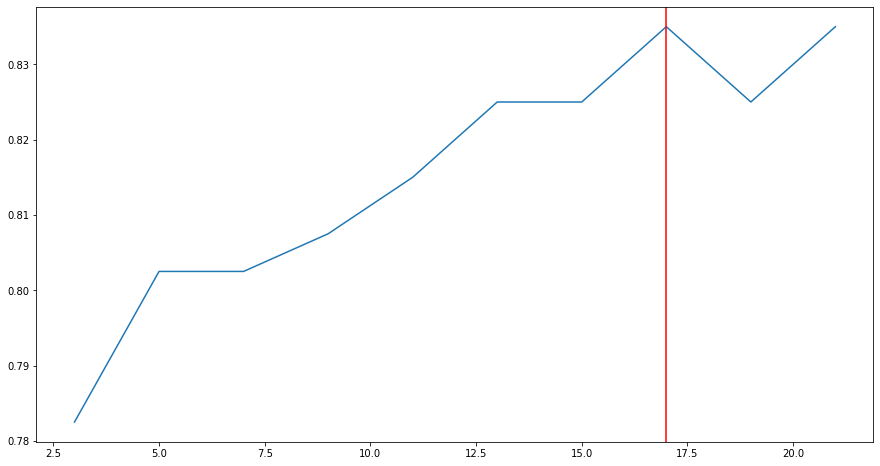

In [141]:
plt.figure(figsize=(15,8))
plt.plot(list(test_acc.keys()), list(test_acc.values()))
plt.axvline(x=max_k, color='red')
plt.show()

In [144]:
knn = KNeighborsClassifier(n_neighbors=max_k)
knn.fit(X_train, y_train)
pred_values = knn.predict(X_test)

In [145]:
print(classification_report(y_test, pred_values))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       100
           1       0.79      0.79      0.79       100
           2       0.79      0.70      0.74       100
           3       0.87      0.89      0.88       100

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.83      0.83      0.83       400



In [146]:
confusion_matrix(y_test, pred_values)

array([[96,  4,  0,  0],
       [13, 79,  8,  0],
       [ 0, 17, 70, 13],
       [ 0,  0, 11, 89]])

# Using Naive Bayes Algorithm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   float64
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 234.5 KB


In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
X.shape, y.shape

((2000, 14), (2000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_class = GaussianNB()

In [ ]:
nb_class.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_class.predict(X_test)

In [ ]:
## Accuracy with all the data
round(accuracy_score(y_test, y_pred)*100,2)

80.8

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       119
           1       0.75      0.74      0.75       128
           2       0.73      0.68      0.70       137
           3       0.84      0.90      0.87       116

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



## With Scaled and Feature Elimiated data

In [ ]:
X_tr_scaled.shape

(1500, 5)

In [ ]:
nb_class = GaussianNB()
nb_class.fit(X_tr_scaled, y_train)

GaussianNB()

In [ ]:
y_scaled_pred = nb_class.predict(X_ts_scaled)

In [ ]:
accuracy_score(y_test, y_scaled_pred)

0.26

In [ ]:
print(classification_report(y_test, y_scaled_pred))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31       119
           1       0.39      0.17      0.24       128
           2       0.23      0.23      0.23       137
           3       0.21      0.34      0.26       116

    accuracy                           0.26       500
   macro avg       0.28      0.26      0.26       500
weighted avg       0.28      0.26      0.26       500



## With IRIS Dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df_iris = pd.DataFrame(iris.data, columns=['SL','SW','PL','PW'])

In [ ]:
df_iris['target']=iris.target

In [ ]:
df_iris.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_iris.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
df_iris.describe()

,SL,SW,PL,PW,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
nbclass = GaussianNB()

In [ ]:
X=df_iris.drop('target', axis=1)
y = df_iris['target']

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [ ]:
nbclass.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nbclass.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])